In [180]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True, font_scale=1.5)
color = sns.color_palette()
sns.set_style('darkgrid')
import mpl_toolkits
from mpl_toolkits.mplot3d import Axes3D
import pylab 

train = pd.read_csv("X_train.csv")
test = pd.read_csv("X_test.csv")
Y_train = pd.read_csv("Y_train.csv")

In [181]:
from Pipeline import *

In [182]:
df_merged = pd.merge(left=train, right=Y_train, left_on=["Trader"], right_on=["Trader"])

index = [2*i + 1 for i in range(df_merged.shape[0]//2)]

df_merged.drop(index, inplace=True)

We can see that there is a great correlation between the type of trader and the average time per operation


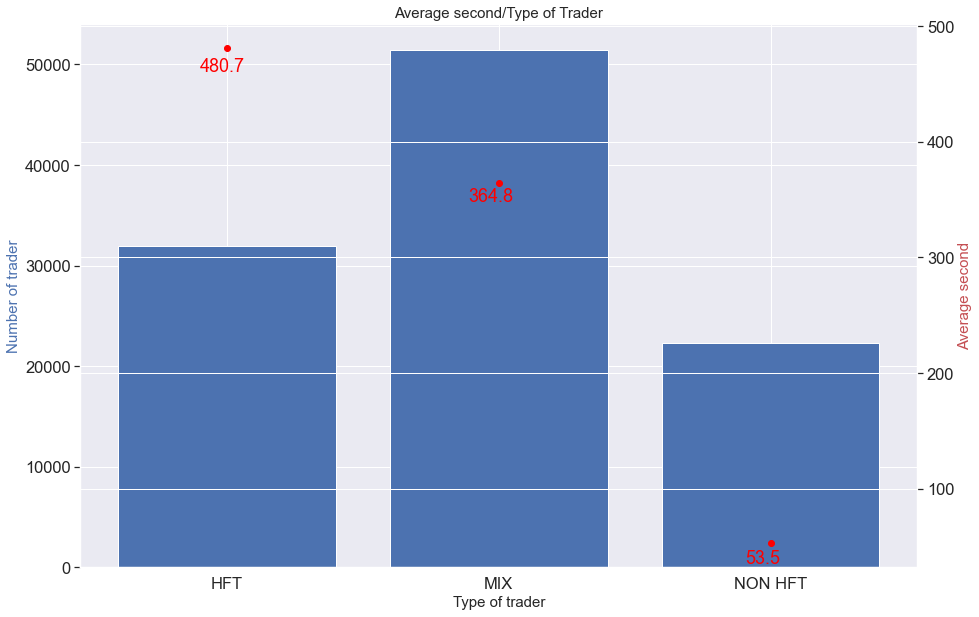

In [183]:
graphique_time(df_merged)

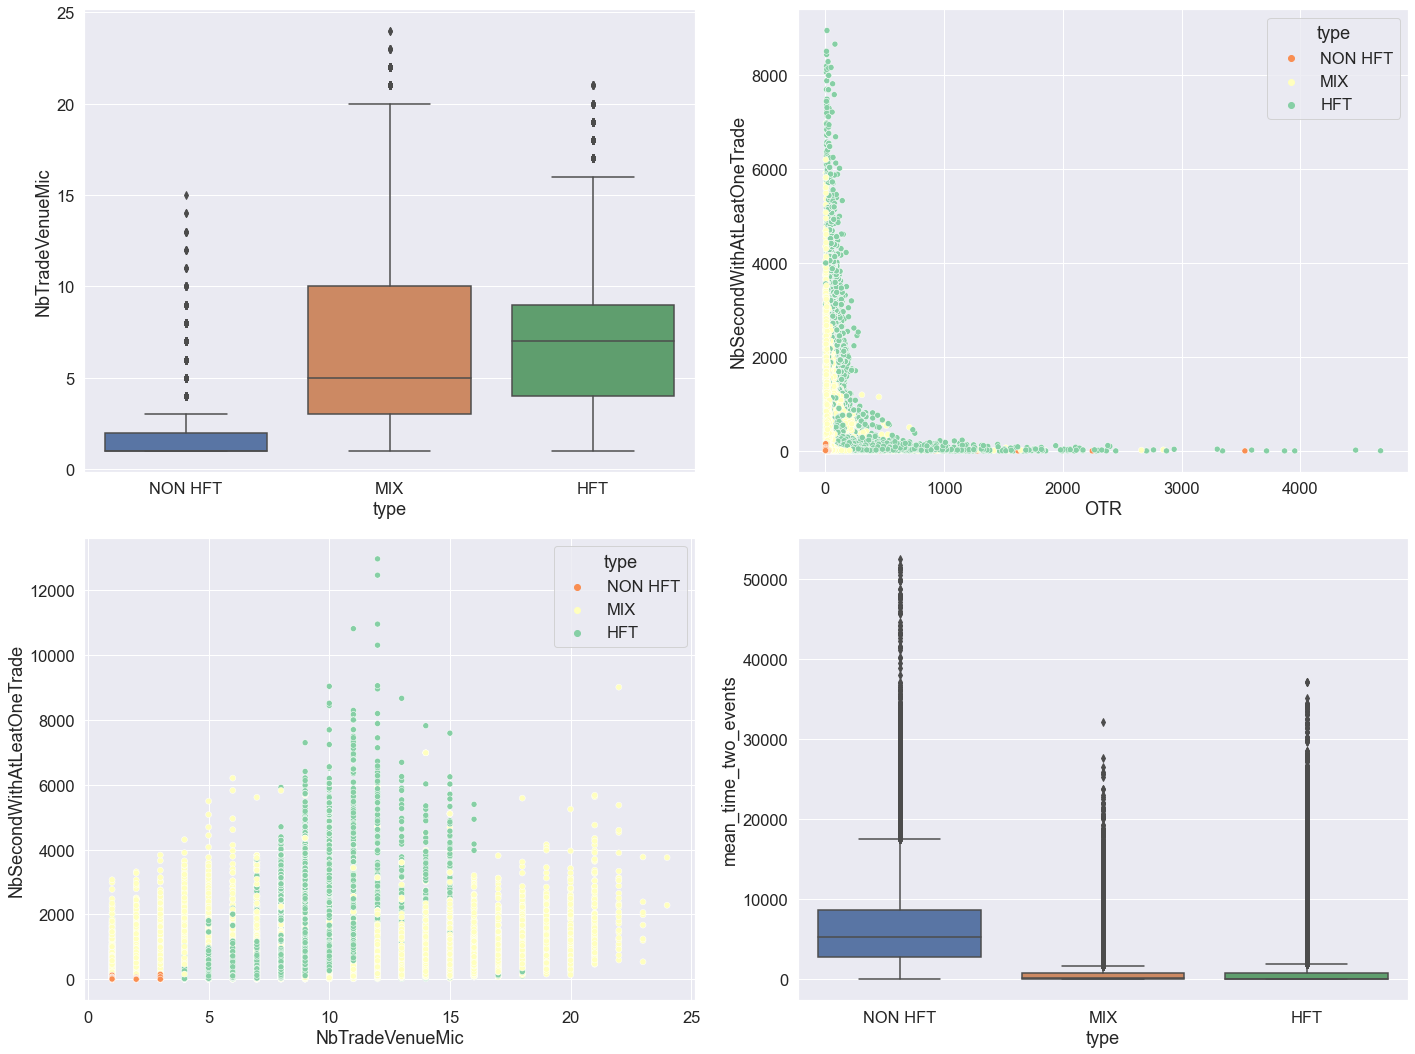

In [184]:
graphique_normal(df_merged)

## Try with LGBM

In [138]:
#Best lr=0.055

import lightgbm as lgb
from sklearn.model_selection import cross_val_score

X = df_merged.drop(["type", "Trader"], axis=1)
X = X[['mean_time_two_events', "OTR", "Share", "OCR", "OMR", 'min_time_two_events', '10_p_time_two_events', 
       'med_time_two_events', 'NbSecondWithAtLeatOneTrade', 'min_dt_TV1', 'mean_dt_TV1', 'med_dt_TV1',
       'min_dt_TV1_TV2', 'mean_dt_TV1_TV2', 'med_dt_TV1_TV2', 'min_dt_TV1_TV3', 'mean_dt_TV1_TV3', 
       'med_dt_TV1_TV3','min_dt_TV1_TV4', 'mean_dt_TV1_TV4', 'med_dt_TV1_TV4',  'NbTradeVenueMic', 'MaxNbTradesBySecond',
       'MeanNbTradesBySecond',  '25_p_lifetime_cancel', '75_p_lifetime_cancel', '90_p_lifetime_cancel']]

X = clean_data(X)

y = df_merged["type"]

model = lgb.LGBMClassifier(reg_alpha=1.2, reg_lambda=0.75, 
                           num_leaves=14, min_child_samples=150, boosting="dart", learning_rate=0.055)
model.fit(X, y)

a = cross_val_score(model, X, y, cv=3)

print(a, np.mean(a))

[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[0.81526332 0.82243839 0.81108905] 0.8162635876185469


## Try with Catboost

In [158]:
from catboost import Pool, CatBoostClassifier
from sklearn.model_selection import cross_val_score

X = df_merged.drop(["type", "Trader"], axis=1)
X = X[['mean_time_two_events', "OTR", "Share", "OCR", "OMR", 'min_time_two_events', '10_p_time_two_events', 
       'med_time_two_events', 'NbSecondWithAtLeatOneTrade', 'min_dt_TV1', 'mean_dt_TV1', 'med_dt_TV1',
       'min_dt_TV1_TV2', 'mean_dt_TV1_TV2', 'med_dt_TV1_TV2', 'min_dt_TV1_TV3', 'mean_dt_TV1_TV3', 
       'med_dt_TV1_TV3','min_dt_TV1_TV4', 'mean_dt_TV1_TV4', 'med_dt_TV1_TV4',  'NbTradeVenueMic', 'MaxNbTradesBySecond',
       'MeanNbTradesBySecond']]
X = clean_data(X)

y = df_merged["type"]

model = CatBoostClassifier(silent=True, learning_rate=0.7)

model.fit(X, y)

a = cross_val_score(model, X, y, cv=3)

print(a, np.mean(a))

[0.81954567 0.76146451 0.76086217] 0.7806241159937491


In [72]:
df_merged.columns

Index(['Index', 'Share', 'Day', 'Trader', 'OTR', 'OCR', 'OMR',
       'min_time_two_events', 'mean_time_two_events', '10_p_time_two_events',
       'med_time_two_events', '25_p_time_two_events', '75_p_time_two_events',
       '90_p_time_two_events', 'max_time_two_events', 'min_lifetime_cancel',
       'mean_lifetime_cancel', '10_p_lifetime_cancel', 'med_lifetime_cancel',
       '25_p_lifetime_cancel', '75_p_lifetime_cancel', '90_p_lifetime_cancel',
       'max_lifetime_cancel', 'NbTradeVenueMic', 'MaxNbTradesBySecond',
       'MeanNbTradesBySecond', 'min_dt_TV1', 'mean_dt_TV1', 'med_dt_TV1',
       'min_dt_TV1_TV2', 'mean_dt_TV1_TV2', 'med_dt_TV1_TV2', 'min_dt_TV1_TV3',
       'mean_dt_TV1_TV3', 'med_dt_TV1_TV3', 'min_dt_TV1_TV4',
       'mean_dt_TV1_TV4', 'med_dt_TV1_TV4', 'NbSecondWithAtLeatOneTrade',
       'type'],
      dtype='object')

## Try with XGBOOST

In [ ]:
from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn . neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

X = df_merged.drop(["type", "Trader"], axis=1)
X = X[['mean_time_two_events', "OTR", "Share", "OCR", "OMR", 'min_time_two_events', '10_p_time_two_events', 
       'med_time_two_events', 'NbSecondWithAtLeatOneTrade', 'min_dt_TV1', 'mean_dt_TV1', 'med_dt_TV1',
       'min_dt_TV1_TV2', 'mean_dt_TV1_TV2', 'med_dt_TV1_TV2', 'min_dt_TV1_TV3', 'mean_dt_TV1_TV3', 
       'med_dt_TV1_TV3','min_dt_TV1_TV4', 'mean_dt_TV1_TV4', 'med_dt_TV1_TV4']]
X = clean_data(X)

y = df_merged["type"]

model = XGBClassifier(n_estimators=500, subsample=0.8, min_child_weight=3, 
learning_rate=0.45, gamma=1.2, colsample_bytree=0.5, max_depth=8, alpha=2, eval_metric='merror')

model.fit(X, y)
fit = XGBClassifier().fit(X,y)
plot_importance(fit)

## Try with an ensemble method

In [198]:
from catboost import Pool, CatBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier

X = df_merged.drop(["type", "Trader"], axis=1)
X = X[['mean_time_two_events', "OTR", "Share", "OCR", "OMR", 'min_time_two_events', '10_p_time_two_events', 
       'med_time_two_events', 'NbSecondWithAtLeatOneTrade', 'min_dt_TV1', 'mean_dt_TV1', 'med_dt_TV1',
       'min_dt_TV1_TV2', 'mean_dt_TV1_TV2', 'med_dt_TV1_TV2', 'min_dt_TV1_TV3', 'mean_dt_TV1_TV3', 
       'med_dt_TV1_TV3','min_dt_TV1_TV4', 'mean_dt_TV1_TV4', 'med_dt_TV1_TV4']]
X = clean_data(X)

y = df_merged["type"]


model_xgb = CatBoostClassifier(silent=True)

model_lgbm = lgb.LGBMClassifier(reg_alpha=1.2, reg_lambda=0.75, 
                           num_leaves=14, min_child_samples=150, boosting="dart", learning_rate=0.055)

model_xgb_2 = XGBClassifier(n_estimators=500, subsample=0.8, min_child_weight=3, 
learning_rate=0.95, gamma=1.2, colsample_bytree=0.5, max_depth=8, alpha=2, eval_metric='merror')

model_3 = RandomForestClassifier(n_estimators=5000)

eclf1 = VotingClassifier(estimators=[ ("lgbm", model_lgbm), ("xgb", model_xgb_2), ("cat", model_xgb), ("Randm_forest", model_3)], voting='soft')

a = cross_val_score(eclf1, X, y, cv=3)

print(a, np.mean(a))

[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[0.81580216 0.7844077  0.72180942] 0.7740064264524146


In [199]:
eclf1.fit(X, y)

[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart


VotingClassifier(estimators=[('lgbm',
                              LGBMClassifier(boosting='dart',
                                             learning_rate=0.055,
                                             min_child_samples=150,
                                             num_leaves=14, reg_alpha=1.2,
                                             reg_lambda=0.75)),
                             ('xgb',
                              XGBClassifier(alpha=2, base_score=None,
                                            booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.5,
                                            eval_metric='merror', gamma=1.2,
                                            gpu_id=None, importance_type='gain',
                                            inte...
                                            monoton

## Application of a PCA

In [25]:
#Here, enter the number of components you wish for the PCA Analysis

PCA = PCA_Analysis(30)

PCA.get_defra_scaled()

,Share,Day,OTR,OCR,OMR,min_time_two_events,mean_time_two_events,10_p_time_two_events,med_time_two_events,25_p_time_two_events,...,min_dt_TV1_TV2,mean_dt_TV1_TV2,med_dt_TV1_TV2,min_dt_TV1_TV3,mean_dt_TV1_TV3,med_dt_TV1_TV3,min_dt_TV1_TV4,mean_dt_TV1_TV4,med_dt_TV1_TV4,NbSecondWithAtLeatOneTrade
0,1.153882,-0.086856,-0.236202,-0.127020,-0.220595,-0.056435,0.470463,-0.063888,-0.119165,-0.093944,...,0.0,0.0,-3.433013e-17,-3.388584e-17,6.413095e-17,0.0,3.408708e-17,6.392338e-17,0.0,-0.511829
1,1.355323,0.698871,-0.240433,0.107288,-0.207427,-0.056435,-0.185661,-0.063888,-0.203653,-0.098566,...,0.0,0.0,-3.433013e-17,-3.388584e-17,6.413095e-17,0.0,3.408708e-17,6.392338e-17,0.0,-0.494769
2,1.355323,-0.244002,-0.242004,0.415368,-0.067091,-0.056435,-0.418488,-0.063888,-0.203654,-0.098566,...,0.0,0.0,-3.433013e-17,-3.388584e-17,6.413095e-17,0.0,3.408708e-17,6.392338e-17,0.0,-0.420329
3,-1.033191,-1.501165,-0.240365,-0.041184,-0.196644,-0.056435,-0.119993,-0.063888,-0.202415,-0.098566,...,0.0,0.0,-3.433013e-17,-3.388584e-17,6.413095e-17,0.0,3.408708e-17,6.392338e-17,0.0,-0.511829
4,1.355323,1.641743,-0.241747,0.129327,0.000000,-0.056435,-0.366792,-0.063888,-0.203654,-0.098566,...,0.0,0.0,-3.433013e-17,-3.388584e-17,6.413095e-17,0.0,3.408708e-17,6.392338e-17,0.0,-0.459100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105777,1.268991,0.384580,-0.244448,0.077130,0.000000,-0.056435,-0.408418,-0.063888,-0.203654,-0.098566,...,0.0,0.0,-3.433013e-17,-3.388584e-17,6.413095e-17,0.0,3.408708e-17,6.392338e-17,0.0,-0.513379
105778,-1.579959,-0.872583,-0.242957,0.077130,0.000000,-0.056435,-0.543385,-0.063888,-0.203654,-0.098566,...,0.0,0.0,-3.433013e-17,-3.388584e-17,6.413095e-17,0.0,3.408708e-17,6.392338e-17,0.0,-0.507176
105779,-1.033191,-1.186874,-0.244472,0.954043,0.000000,-0.056435,-0.414046,-0.063888,-0.203654,-0.098566,...,0.0,0.0,-3.433013e-17,-3.388584e-17,6.413095e-17,0.0,3.408708e-17,6.392338e-17,0.0,-0.493219
105780,-0.486423,0.856016,-0.244233,2.596516,0.000000,-0.056435,-0.478949,-0.063888,-0.203654,-0.098566,...,0.0,0.0,-3.433013e-17,-3.388584e-17,6.413095e-17,0.0,3.408708e-17,6.392338e-17,0.0,-0.463753


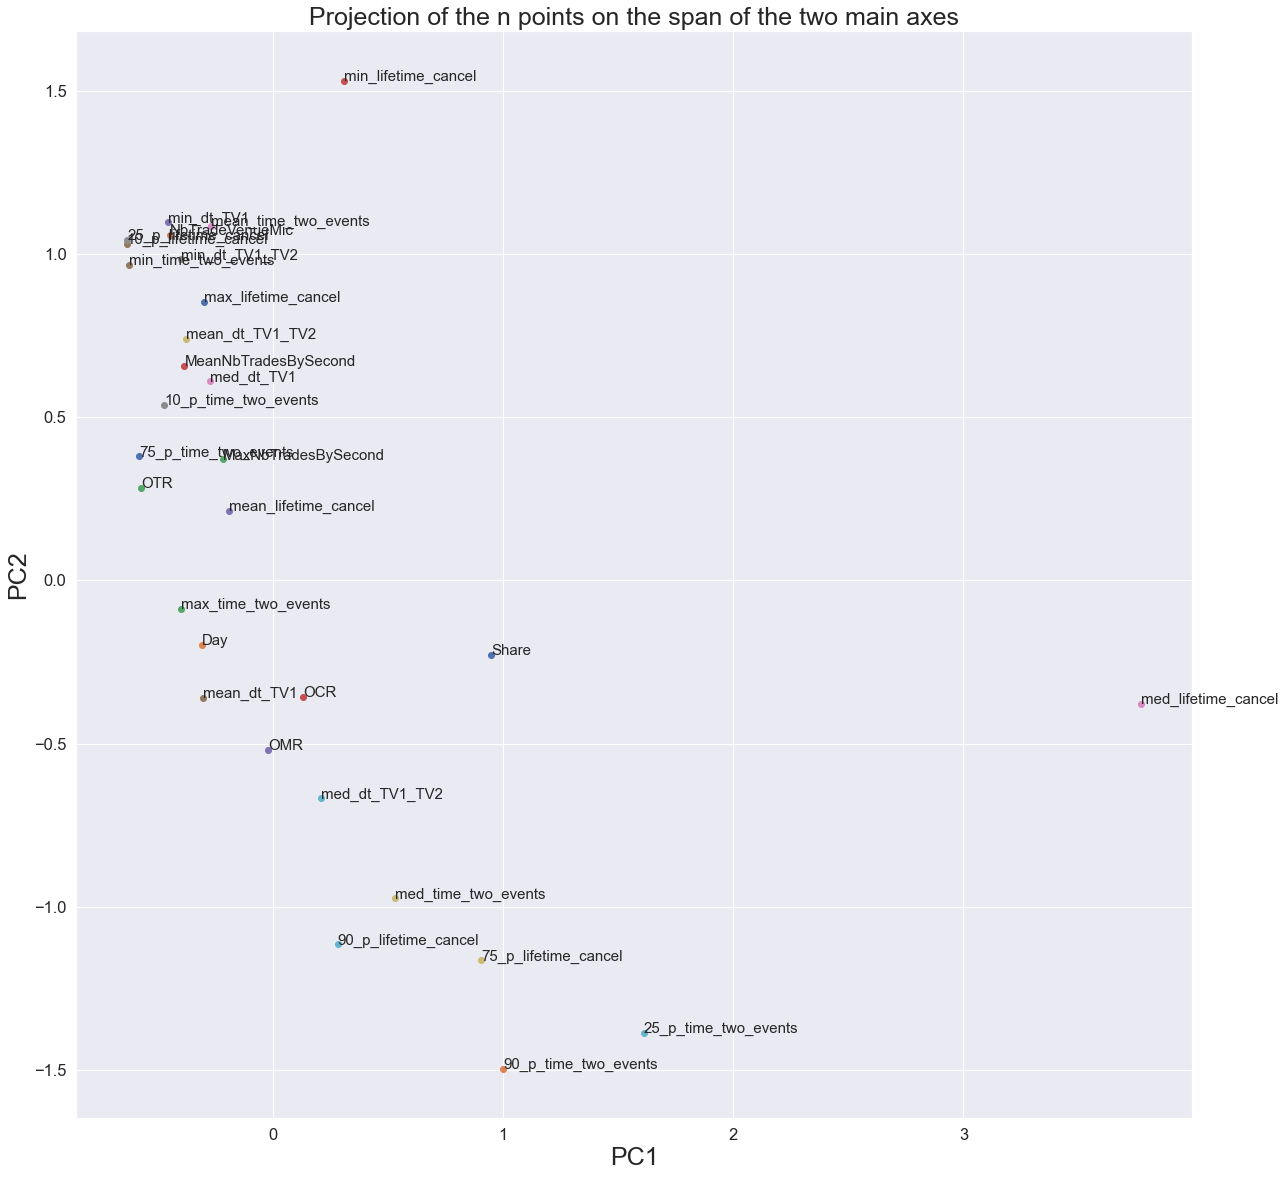

In [26]:
PCA.PCA_graph_2D()

The variance explained by the 30 main axes is : 99.751 %


The 30 most important axes are :['Share', 'Day', 'OTR', 'OCR', 'OMR', 'min_time_two_events', 'mean_time_two_events', '10_p_time_two_events', 'med_time_two_events', '25_p_time_two_events', '75_p_time_two_events', '90_p_time_two_events', 'max_time_two_events', 'min_lifetime_cancel', 'mean_lifetime_cancel', '10_p_lifetime_cancel', 'med_lifetime_cancel', '25_p_lifetime_cancel', '75_p_lifetime_cancel', '90_p_lifetime_cancel', 'max_lifetime_cancel', 'NbTradeVenueMic', 'MaxNbTradesBySecond', 'MeanNbTradesBySecond', 'min_dt_TV1', 'mean_dt_TV1', 'med_dt_TV1', 'min_dt_TV1_TV2', 'min_dt_TV1_TV3', 'med_dt_TV1_TV3']


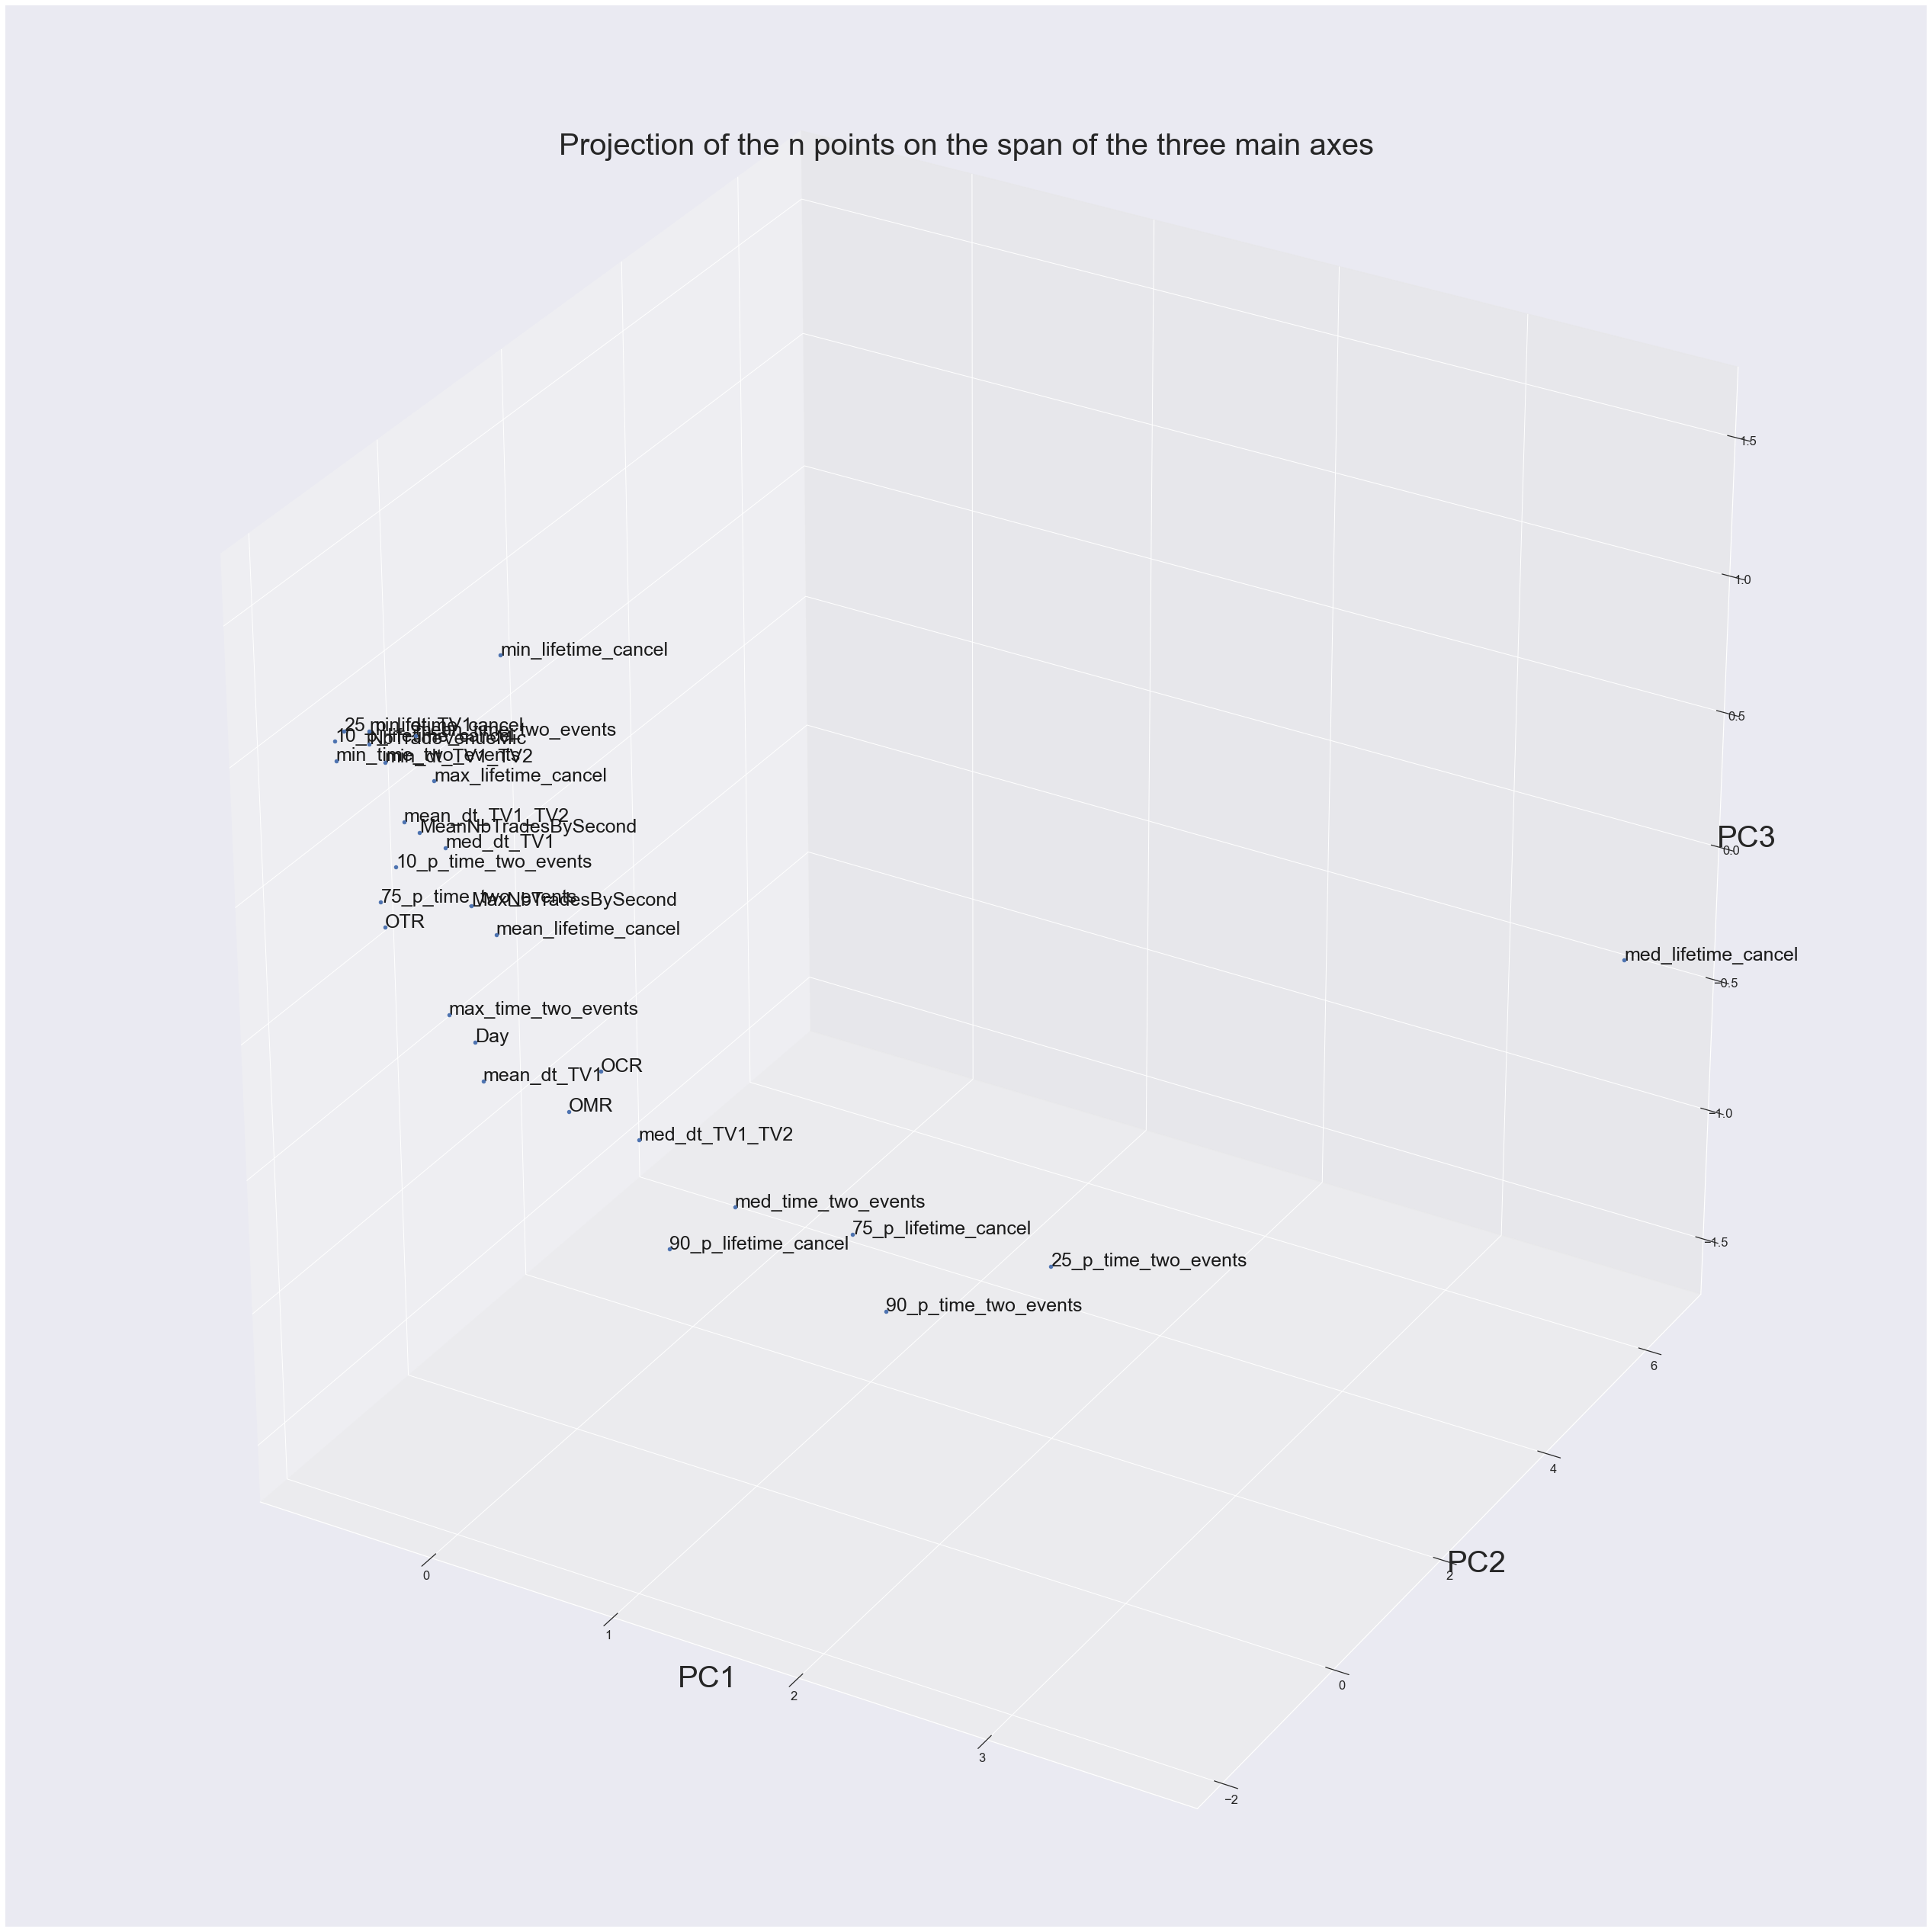

In [27]:
PCA.PCA_graph_3D()

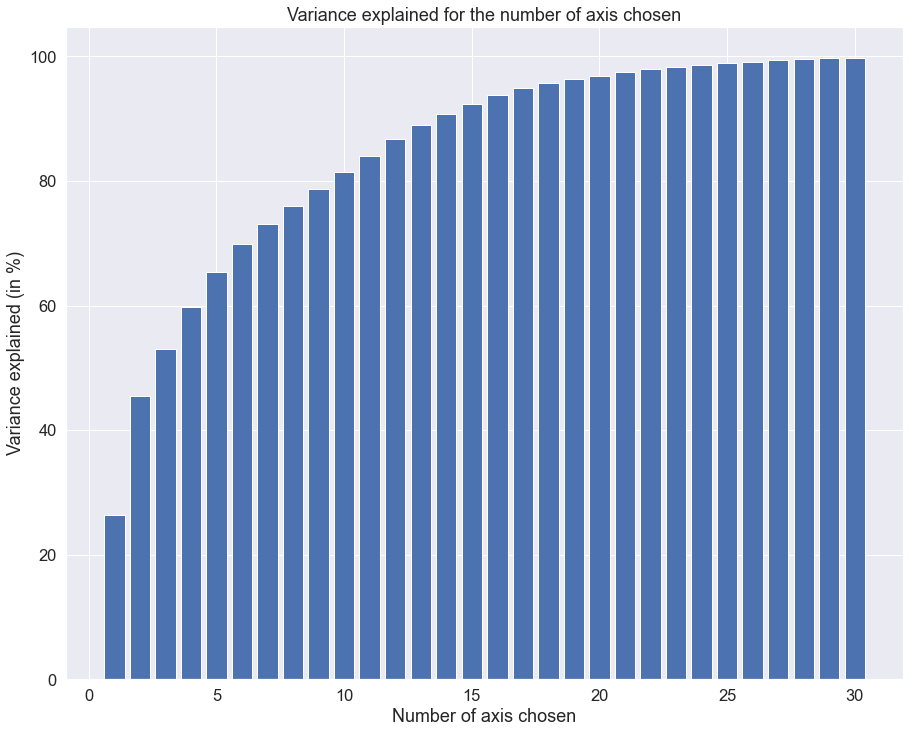

In [28]:
PCA.PCA_Variance()

In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_score(model, X_train, y_train, cv=3)

## Creation of the submission file

In [200]:
test = pd.read_csv("X_test.csv")
test = clean_data(test)
test = test[X.columns]

y_pred = eclf1.predict(test)

test = pd.read_csv("X_test.csv")
test["type"] = 0

test = test[["Trader", "type"]]

for i in range(test.shape[0]):
    test["type"][i] = y_pred[i]

In [202]:
a = test["Trader"].unique()

In [203]:
df = pd.DataFrame()
df["Trader"] = a
df["MIX"] = 0
df["HFT"] = 0
df["NON HFT"] = 0
df["Gini"] = 0

for i in range(df.shape[0]):
    df["MIX"][i] = list(test[test["Trader"]==df["Trader"][i]]["type"]).count("MIX")
    df["HFT"][i] = list(test[test["Trader"]==df["Trader"][i]]["type"]).count("HFT")
    df["NON HFT"][i] = list(test[test["Trader"]==df["Trader"][i]]["type"]).count("NON HFT")
    a = df["MIX"][i] + df["HFT"][i] + df["NON HFT"][i]
    df["Gini"][i] = int(1 - (df["MIX"][i]/a)**2 - (df["HFT"][i]/a)**2 - (df["NON HFT"][i]/a)**2)

In [204]:
a = []
for i in range(df.shape[0]):
    a.append(1 - (df["MIX"][i]/(df["MIX"][i]+ df["HFT"][i]+df["NON HFT"][i]))**2 - (df["HFT"][i]/(df["MIX"][i]+ df["HFT"][i]+df["NON HFT"][i]))**2 - (df["NON HFT"][i]/(df["MIX"][i]+ df["HFT"][i]+df["NON HFT"][i]))**2)

In [205]:
df["Gini"]=a

In [206]:
df.sort_values(by="Gini", ascending=False)

,Trader,MIX,HFT,NON HFT,Gini
76,Mike the Microphone,15,27,8,0.592800
75,Merlock the Magician,105,35,152,0.585358
25,Bowler Hat Guy,46,9,46,0.577198
60,Friend Owl,164,32,176,0.574402
4,Alices Sister,64,19,100,0.568306
...,...,...,...,...,...
80,Monstro,4,0,0,0.000000
21,Bobble,0,0,2,0.000000
26,Braddock,0,0,1,0.000000
31,Bucky Oryx-Antlerson,0,0,1,0.000000


In [201]:
import statistics

submission = pd.DataFrame()
submission["Trader"] = test["Trader"].unique()
submission["type"] = 0

for i in range(submission.shape[0]):
    submission["type"][i] = statistics.mode(test[test["Trader"]==submission["Trader"][i]]["type"])
    
submission.to_csv("Test_new_Cat_Boost.csv", index=False)

## Try with Multi-Layer-Perceptron

In [184]:
from sklearn.model_selection import train_test_split

X = df_merged.drop(["type", "Trader"], axis=1)
X = X[['mean_time_two_events', "OTR", "Share", "OCR", "OMR", 'min_time_two_events', '10_p_time_two_events', 
       'med_time_two_events', 'NbSecondWithAtLeatOneTrade', 'min_dt_TV1', 'mean_dt_TV1', 'med_dt_TV1',
       'min_dt_TV1_TV2', 'mean_dt_TV1_TV2', 'med_dt_TV1_TV2', 'min_dt_TV1_TV3', 'mean_dt_TV1_TV3', 
       'med_dt_TV1_TV3','min_dt_TV1_TV4', 'mean_dt_TV1_TV4', 'med_dt_TV1_TV4', 'MaxNbTradesBySecond',
       'MeanNbTradesBySecond', 'med_lifetime_cancel',
       '25_p_lifetime_cancel', '75_p_lifetime_cancel']]
X = clean_data(X)

y = df_merged["type"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [151]:
df_merged.columns

Index(['Index', 'Share', 'Day', 'Trader', 'OTR', 'OCR', 'OMR',
       'min_time_two_events', 'mean_time_two_events', '10_p_time_two_events',
       'med_time_two_events', '25_p_time_two_events', '75_p_time_two_events',
       '90_p_time_two_events', 'max_time_two_events', 'min_lifetime_cancel',
       'mean_lifetime_cancel', '10_p_lifetime_cancel', 'med_lifetime_cancel',
       '25_p_lifetime_cancel', '75_p_lifetime_cancel', '90_p_lifetime_cancel',
       'max_lifetime_cancel', 'NbTradeVenueMic', 'MaxNbTradesBySecond',
       'MeanNbTradesBySecond', 'min_dt_TV1', 'mean_dt_TV1', 'med_dt_TV1',
       'min_dt_TV1_TV2', 'mean_dt_TV1_TV2', 'med_dt_TV1_TV2', 'min_dt_TV1_TV3',
       'mean_dt_TV1_TV3', 'med_dt_TV1_TV3', 'min_dt_TV1_TV4',
       'mean_dt_TV1_TV4', 'med_dt_TV1_TV4', 'NbSecondWithAtLeatOneTrade',
       'type', 'Prediction'],
      dtype='object')

In [154]:
X.columns

Index(['mean_time_two_events', 'OTR', 'Share', 'OCR', 'OMR',
       'min_time_two_events', '10_p_time_two_events', 'med_time_two_events',
       'NbSecondWithAtLeatOneTrade', 'min_dt_TV1', 'mean_dt_TV1', 'med_dt_TV1',
       'min_dt_TV1_TV2', 'mean_dt_TV1_TV2', 'med_dt_TV1_TV2', 'min_dt_TV1_TV3',
       'mean_dt_TV1_TV3', 'med_dt_TV1_TV3', 'min_dt_TV1_TV4',
       'mean_dt_TV1_TV4', 'med_dt_TV1_TV4', 'MaxNbTradesBySecond',
       'MeanNbTradesBySecond', 'med_lifetime_cancel', '25_p_lifetime_cancel',
       '75_p_lifetime_cancel'],
      dtype='object')

In [155]:
from sklearn . neural_network import MLPClassifier

mlp = MLPClassifier(
              hidden_layer_sizes=(35, 200, 200),
              momentum=0.99999999)

#mlp.fit(X_train,y_train)

In [156]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(max_iter=300)

#mlp.fit(X, y)

In [157]:
a = cross_val_score(mlp, X, y, cv=3)
print(a, np.mean(a))

[0.75292816 0.78559882 0.69100964] 0.7431788757138921


In [164]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(max_iter=300, momentum=0.85)

a = cross_val_score(mlp, X, y, cv=3)
print(a, np.mean(a))

[0.75596268 0.78817958 0.67813386] 0.7407587054050531


In [92]:
test = pd.read_csv("X_test.csv")
test = clean_data(test)
test = test[X.columns]

y_pred = mlp.predict(test)

test = pd.read_csv("X_test.csv")
test["type"] = 0

test = test[["Trader", "type"]]

for i in range(test.shape[0]):
    test["type"][i] = y_pred[i]

In [93]:
import statistics

submission = pd.DataFrame()
submission["Trader"] = test["Trader"].unique()
submission["type"] = 0

for i in range(submission.shape[0]):
    submission["type"][i] = statistics.mode(test[test["Trader"]==submission["Trader"][i]]["type"])
    
submission.to_csv("Test_new_MLP.csv", index=False)